Сылка на описание данных и сами данные: 'https://archive.ics.uci.edu/ml/datasets/Adult'

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("adult.data", header=None)

data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
test_data = pd.read_csv("adult.test", header=None)

In [4]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
features = {0:'age', 1:'workclass', 2:'fnlwgt', 3:'education', 4:'education_num', 5:'marital_status'\
            , 6:'occupation', 7:'relationship', 8:'race', 9:'sex', 10:'capital_gain', 11:'capital_loss',\
            12:'hours_per_week', 13:'native_country', 14:'year_income'}

In [6]:
data.shape, test_data.shape

((32561, 15), (16281, 15))

In [7]:
data = pd.concat([data, test_data], axis=0)

In [8]:
data.shape

(48842, 15)

In [9]:
data.rename(columns=features, inplace=True)

In [10]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,year_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Довольно подозрительно смотряться максимальные значения
capital_gain и capital_loss на фоне квантилей. Проверим данные фичи на выбросы.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

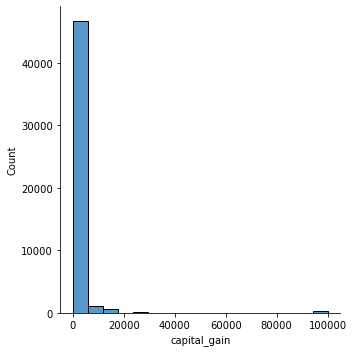

In [13]:
sns.displot(data['capital_gain'])

In [14]:
data.loc[data['capital_gain']>20000].count()

age               381
workclass         381
fnlwgt            381
education         381
education_num     381
marital_status    381
occupation        381
relationship      381
race              381
sex               381
capital_gain      381
capital_loss      381
hours_per_week    381
native_country    381
year_income       381
dtype: int64

In [15]:
data.loc[data['capital_gain']>90000].count()

age               244
workclass         244
fnlwgt            244
education         244
education_num     244
marital_status    244
occupation        244
relationship      244
race              244
sex               244
capital_gain      244
capital_loss      244
hours_per_week    244
native_country    244
year_income       244
dtype: int64

In [16]:
data['year_income'].loc[data['capital_gain']>90000].value_counts()

 >50K     159
 >50K.     85
Name: year_income, dtype: int64

все зарабатывают больше 50к. Сделаем вывод о отм что это не выьросы.

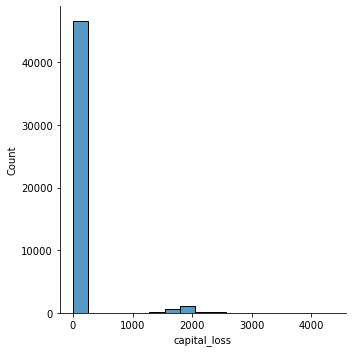

In [17]:
sns.displot(data['capital_loss'])

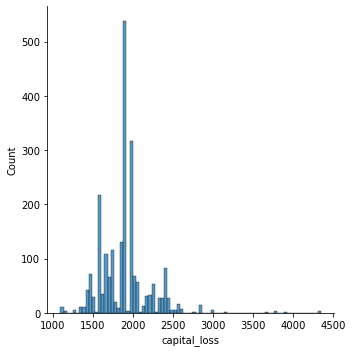

In [18]:
sns.displot(data['capital_loss'].loc[data['capital_loss']>1000])

Создадим 2 новые классовые фичи. Разделим capital_gain на меньше и больше чем 20k,
и capitall_loss до и после 1000

In [19]:
data['capital_loss_class'] = data['capital_loss']\
                            .apply(lambda i : 0 if i <= 1000 else 1)

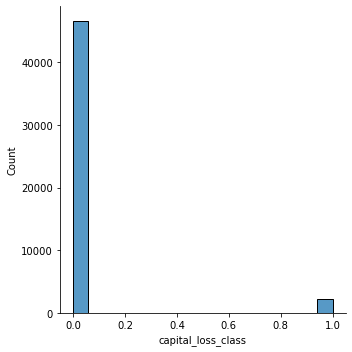

In [20]:
sns.displot(data['capital_loss_class'])

In [21]:
data['capital_gain_class'] = data['capital_gain']\
                            .apply(lambda i : 0 if i <= 20000 else 1)

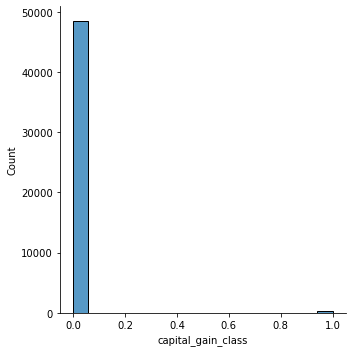

In [22]:
sns.displot(data['capital_gain_class'])

In [23]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,year_income,capital_loss_class,capital_gain_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0


In [24]:
data.year_income.value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: year_income, dtype: int64

In [25]:
data = data.drop('fnlwgt', axis=1)

In [26]:
data.loc[(data['year_income'] == ' >50K.'), 'year_income'] = ' >50K'

In [27]:

data.loc[(data['year_income'] == ' <=50K.'), 'year_income'] = ' <=50K'


In [28]:
data.year_income.value_counts()

 <=50K    37155
 >50K     11687
Name: year_income, dtype: int64

In [29]:
X = data.drop(['year_income','capital_gain','capital_loss'], axis=1)

In [30]:
X = pd.get_dummies(X)

In [31]:
y = pd.get_dummies(data['year_income'])

In [32]:
y = y.drop(' <=50K', axis=1)

In [33]:
y.head()

,>50K
0,0
1,0
2,0
3,0
4,0


In [34]:
#categorical_columns = [ 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',\
#            'native_country', 'year_income', 'capital_gain_class', 'capital_loss_class']
#continuous_columns = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week',]

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
y.value_counts()

 >50K
0        37155
1        11687
dtype: int64

выборка не сбалансирована, проведем балансировку

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [41]:
y_ros.value_counts()

 >50K
1        37155
0        37155
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.33, random_state=42)

In [46]:
clf = LogisticRegression()

In [47]:
clf.fit(X_train, y_train)

/Users/maximcucer/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/maximcucer/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred = clf.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix

In [111]:
metrics = pd.DataFrame({'accuracy':[1,1], 'precision': [1,1], 'recall':[1,1], 'f1':[1,1]})

In [113]:
metrics.loc[0, 'accuracy'] = accuracy_score(y_test, y_pred)
metrics.loc[0, 'precision'] = precision_score(y_test, y_pred)
metrics.loc[0, 'recall'] = recall_score(y_test, y_pred)
metrics.loc[0, 'f1'] = f1_score(y_test, y_pred)

In [114]:
confusion_matrix(y_test, y_pred)

array([[ 9579,  2725],
       [ 1938, 10281]])

In [115]:
metrics

,accuracy,precision,recall,f1
0,0.809852,0.790481,0.841395,0.815144
1,1.000000,1.000000,1.000000,1.000000


Построим модель PU learning

In [118]:
data = pd.get_dummies(data).drop('year_income_ <=50K', axis=1)
data.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,capital_loss_class,capital_gain_class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,year_income_ >50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
mod_data = data.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
pos_sample_len = int(np.ceil(0.5 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 5844/11687 as positives and unlabeling the rest


In [174]:
mod_data.index = list(range(mod_data.shape[0]))

In [175]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1

In [176]:
mod_data['class_test']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
48837   -1
48838   -1
48839   -1
48840   -1
48841   -1
Name: class_test, Length: 48842, dtype: int64

In [177]:
mod_data['class_test'].value_counts()

-1    42998
 1     5844
Name: class_test, dtype: int64

In [178]:
mod_data.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,capital_loss_class,capital_gain_class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,year_income_ >50K,class_test
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-1
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-1
2,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-1
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-1
4,28,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [179]:
x_data = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-2].values # original class

In [180]:
mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(5844, 111) (5844, 111)


In [181]:
!pip install pulearn

In [182]:
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

In [183]:
from pulearn import ElkanotoPuClassifier
# https://towardsdatascience.com/semi-supervised-classification-of-unlabeled-data-pu-learning-81f96e96f7cb
# https://cseweb.ucsd.edu/~elkan/posonly.pdf

from sklearn.svm import SVC




svc = SVC(C=10, kernel='rbf', gamma=0.4, probability=True)
pu_estimator = ElkanotoPuClassifier(estimator=svc, hold_out_ratio=0.2)

pu_estimator = ElkanotoPuClassifier(estimator=svc, hold_out_ratio=0.2)
pu_estimator.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-2].values)

y_predict = pu_estimator.predict(sample_test.iloc[:,:-2].values)
y_test2 = sample_test.iloc[:,-2].values

In [184]:
metrics.loc[1, 'accuracy'] = accuracy_score(y_test2, y_predict>0)
metrics.loc[1, 'precision'] = precision_score(y_test2, y_predict>0)
metrics.loc[1, 'recall'] = recall_score(y_test2, y_predict>0)
metrics.loc[1, 'f1'] = f1_score(y_test2, y_predict>0)

In [185]:
metrics

,accuracy,precision,recall,f1
0,0.809852,0.790481,0.841395,0.815144
1,0.411934,0.180441,0.938452,0.302684


В данной задаче PU learning показал метрики намного хуже, пробывал значение P: .1, .25, .5 лучше всего себя показала .5